# Non-Linear Regression: China GDP Prediction (1960-2014)

This notebook demonstrates non-linear regression to predict China's GDP using polynomial features.
We'll evaluate the model using R² score and create actual vs predicted visualizations.

## 1. Import Required Libraries

We'll import all the necessary libraries for data manipulation, visualization, and machine learning:

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 6)

## 2. Load and Explore the Dataset

Let's load the China GDP dataset and examine its structure to understand what we're working with:

In [2]:
# Load and explore the dataset
df = pd.read_csv('china_gdp.csv')

print(f"Dataset shape: {df.shape}")
print(f"Years: {df['Year'].min()} to {df['Year'].max()}")
print("\nFirst few rows:")
print(df.head())
print("\nDataset info:")
print(df.info())

Dataset shape: (55, 2)
Years: 1960 to 2014

First few rows:
   Year         Value
0  1960  5.918412e+10
1  1961  4.955705e+10
2  1962  4.668518e+10
3  1963  5.009730e+10
4  1964  5.906225e+10

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    55 non-null     int64  
 1   Value   55 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1012.0 bytes
None


## 3. Data Visualization

Let's visualize the GDP trend over time to understand the growth pattern. This will help us determine if a non-linear approach is appropriate:

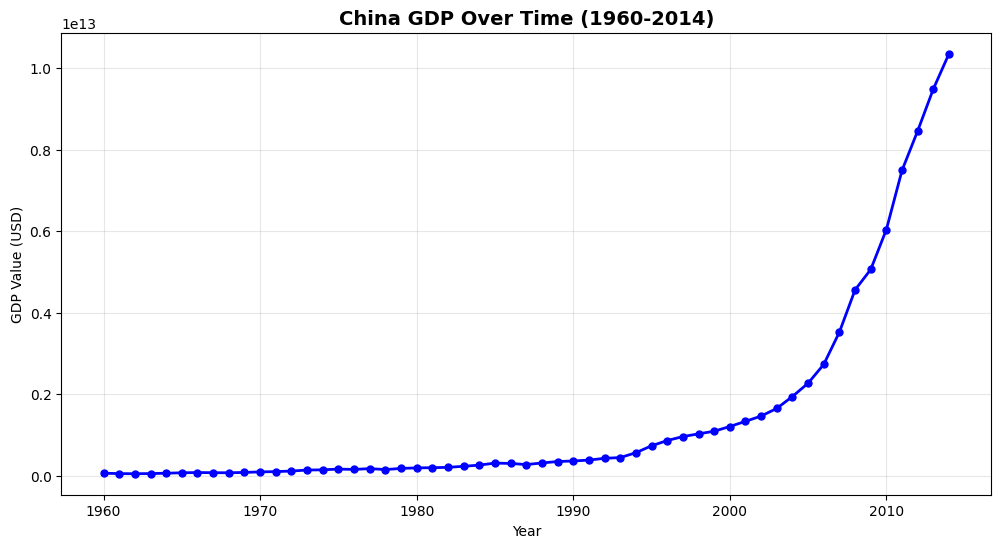

The GDP shows exponential growth, especially after 1980 - perfect for polynomial regression!


In [3]:
# Visualize the GDP trend
plt.figure(figsize=(12, 6))
plt.plot(df['Year'], df['Value'], 'bo-', linewidth=2, markersize=5)
plt.title('China GDP Over Time (1960-2014)', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('GDP Value (USD)')
plt.grid(True, alpha=0.3)
plt.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))
plt.show()

print("The GDP shows exponential growth, especially after 1980 - perfect for polynomial regression!")

## 4. Data Preparation

Now we'll prepare our features (Year) and target variable (GDP Value). We'll also normalize the years to avoid numerical issues during polynomial feature generation:

In [4]:
# Prepare the data
X = df[['Year']].values
y = df['Value'].values

# Normalize years to avoid numerical issues (subtract minimum year)
X_normalized = X - X.min()

print(f"Original year range: {X.min()} to {X.max()}")
print(f"Normalized range: {X_normalized.min()} to {X_normalized.max()}")
print(f"Feature shape: {X.shape}, Target shape: {y.shape}")

Original year range: 1960 to 2014
Normalized range: 0 to 54
Feature shape: (55, 1), Target shape: (55,)


## 5. Train-Test Split

We'll split our data into training (80%) and testing (20%) sets to evaluate model performance on unseen data:

In [5]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_normalized, y, test_size=0.2, random_state=42
)

print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")

Training samples: 44
Testing samples: 11


## 6. Build and Compare Non-Linear Models

We'll test different polynomial degrees (2, 3, 4, 5) to find the best fit. Higher degrees can capture more complex patterns but may lead to overfitting:

In [6]:
# Test different polynomial degrees
degrees = [2, 3, 4, 5]
results = {}

print("Testing different polynomial degrees:")
print("-" * 40)

for degree in degrees:
    # Create polynomial regression model
    model = Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('linear', LinearRegression())
    ])
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate R² scores
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    results[degree] = {
        'model': model,
        'train_r2': train_r2,
        'test_r2': test_r2
    }
    
    print(f"Degree {degree}: Train R² = {train_r2:.4f}, Test R² = {test_r2:.4f}")

# Select best model
best_degree = max(results.keys(), key=lambda k: results[k]['test_r2'])
best_model = results[best_degree]['model']

print(f"\nBest model: Polynomial degree {best_degree}")
print(f"Best test R² score: {results[best_degree]['test_r2']:.4f}")

Testing different polynomial degrees:
----------------------------------------
Degree 2: Train R² = 0.8365, Test R² = 0.8616
Degree 3: Train R² = 0.9634, Test R² = 0.9679
Degree 4: Train R² = 0.9925, Test R² = 0.9952
Degree 5: Train R² = 0.9956, Test R² = 0.9967

Best model: Polynomial degree 5
Best test R² score: 0.9967


## 7. Model Evaluation

Let's evaluate our best model using various performance metrics:
- **R² Score**: Measures how well the model explains the variance in the data (closer to 1 is better)
- **Mean Squared Error (MSE)**: Average of squared differences between actual and predicted values
- **Mean Absolute Error (MAE)**: Average of absolute differences between actual and predicted values

In [7]:
# Evaluate the best model
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Calculate performance metrics
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print("=" * 50)
print("MODEL PERFORMANCE METRICS")
print("=" * 50)
print(f"Best Model: Polynomial Regression (degree {best_degree})")
print(f"\nR² Score:")
print(f"  Training: {train_r2:.4f}")
print(f"  Testing:  {test_r2:.4f}")
print(f"\nMean Squared Error:")
print(f"  Training: {train_mse:.2e}")
print(f"  Testing:  {test_mse:.2e}")
print(f"\nMean Absolute Error:")
print(f"  Training: {train_mae:.2e}")
print(f"  Testing:  {test_mae:.2e}")

# Model interpretation
if test_r2 > 0.95:
    print("\n✅ Excellent model performance!")
elif test_r2 > 0.85:
    print("\n✅ Very good model performance!")
elif test_r2 > 0.75:
    print("\n✅ Good model performance!")
else:
    print("\n⚠️ Model needs improvement")

MODEL PERFORMANCE METRICS
Best Model: Polynomial Regression (degree 5)

R² Score:
  Training: 0.9956
  Testing:  0.9967

Mean Squared Error:
  Training: 2.64e+22
  Testing:  2.14e+22

Mean Absolute Error:
  Training: 1.02e+11
  Testing:  8.18e+10

✅ Excellent model performance!


## 8. Comprehensive Visualizations

Now let's create four different plots to thoroughly analyze our model:
1. **GDP Trend with Polynomial Fit**: Shows how well our model captures the overall trend
2. **Actual vs Predicted**: Scatter plot to see how close predictions are to actual values
3. **Residuals Plot**: Shows the distribution of prediction errors
4. **Model Comparison**: Compares R² scores across different polynomial degrees

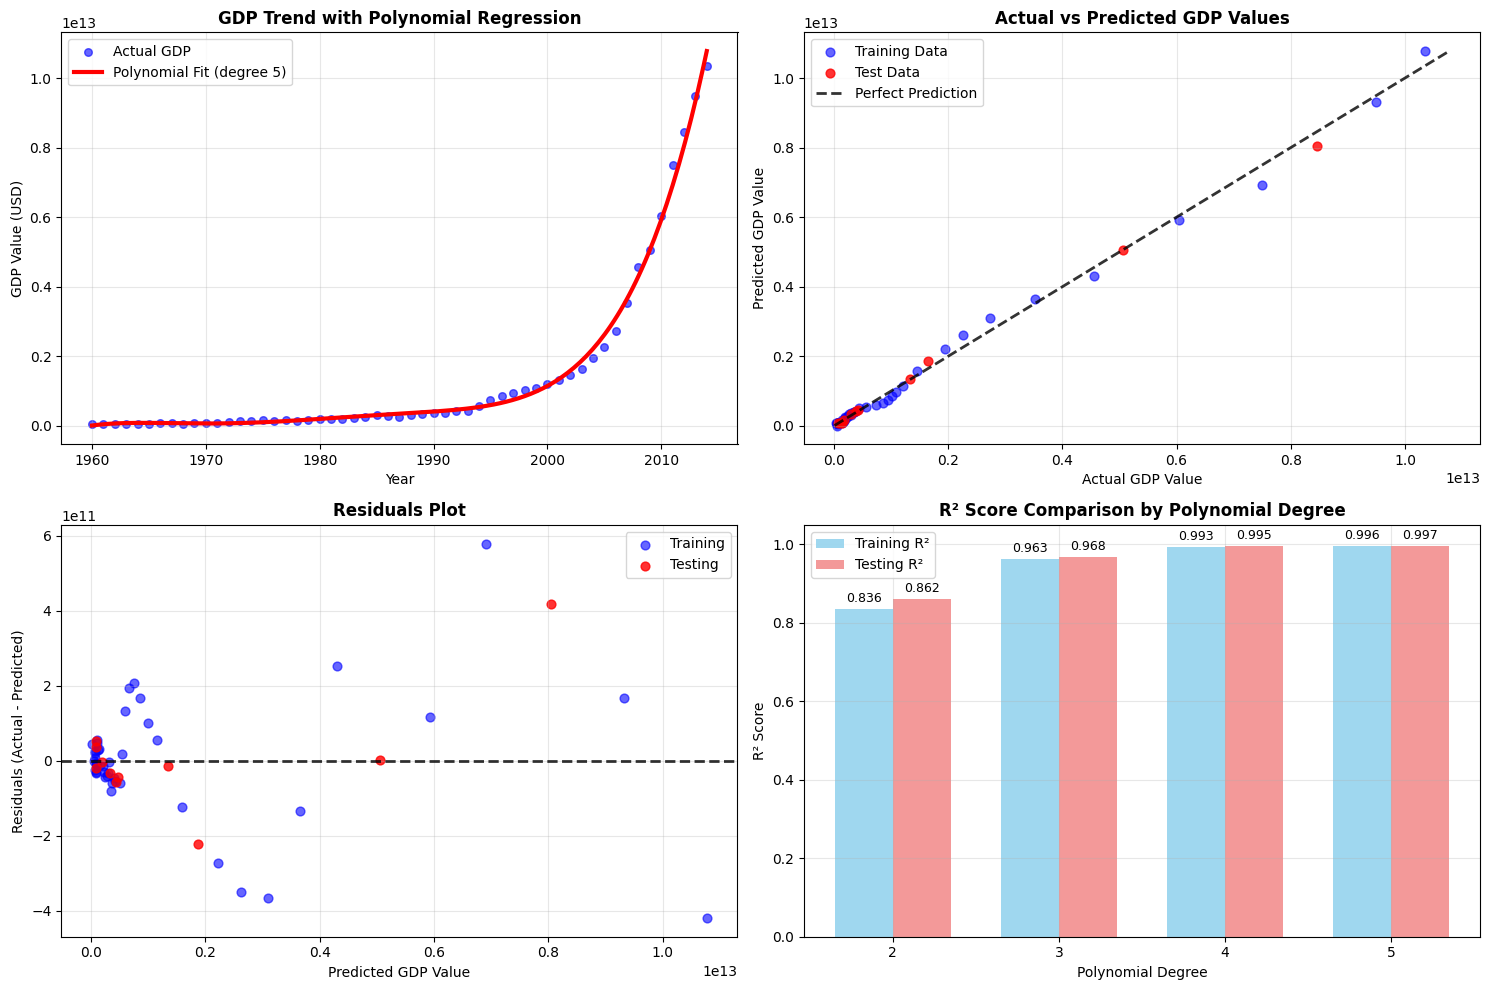

In [8]:
# Create comprehensive visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Original data with polynomial fit
X_plot = np.linspace(X_normalized.min(), X_normalized.max(), 200).reshape(-1, 1)
y_plot = best_model.predict(X_plot)
X_plot_years = X_plot.flatten() + X.min()

axes[0, 0].scatter(X.flatten(), y, color='blue', alpha=0.6, s=30, label='Actual GDP')
axes[0, 0].plot(X_plot_years, y_plot, color='red', linewidth=3, label=f'Polynomial Fit (degree {best_degree})')
axes[0, 0].set_title('GDP Trend with Polynomial Regression', fontweight='bold', fontsize=12)
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('GDP Value (USD)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].ticklabel_format(style='scientific', axis='y', scilimits=(0,0))

# 2. Actual vs Predicted scatter plot
axes[0, 1].scatter(y_train, y_train_pred, color='blue', alpha=0.6, s=40, label='Training Data')
axes[0, 1].scatter(y_test, y_test_pred, color='red', alpha=0.8, s=40, label='Test Data')

# Perfect prediction line
min_val = min(y.min(), y_train_pred.min(), y_test_pred.min())
max_val = max(y.max(), y_train_pred.max(), y_test_pred.max())
axes[0, 1].plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.8, linewidth=2, label='Perfect Prediction')

axes[0, 1].set_title('Actual vs Predicted GDP Values', fontweight='bold', fontsize=12)
axes[0, 1].set_xlabel('Actual GDP Value')
axes[0, 1].set_ylabel('Predicted GDP Value')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].ticklabel_format(style='scientific', axis='both', scilimits=(0,0))

# 3. Residuals plot
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

axes[1, 0].scatter(y_train_pred, train_residuals, color='blue', alpha=0.6, s=40, label='Training')
axes[1, 0].scatter(y_test_pred, test_residuals, color='red', alpha=0.8, s=40, label='Testing')
axes[1, 0].axhline(y=0, color='black', linestyle='--', alpha=0.8, linewidth=2)
axes[1, 0].set_title('Residuals Plot', fontweight='bold', fontsize=12)
axes[1, 0].set_xlabel('Predicted GDP Value')
axes[1, 0].set_ylabel('Residuals (Actual - Predicted)')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].ticklabel_format(style='scientific', axis='both', scilimits=(0,0))

# 4. R² comparison across degrees
degrees_list = list(degrees)
train_r2_list = [results[d]['train_r2'] for d in degrees_list]
test_r2_list = [results[d]['test_r2'] for d in degrees_list]

x_pos = np.arange(len(degrees_list))
width = 0.35

axes[1, 1].bar(x_pos - width/2, train_r2_list, width, label='Training R²', alpha=0.8, color='skyblue')
axes[1, 1].bar(x_pos + width/2, test_r2_list, width, label='Testing R²', alpha=0.8, color='lightcoral')
axes[1, 1].set_title('R² Score Comparison by Polynomial Degree', fontweight='bold', fontsize=12)
axes[1, 1].set_xlabel('Polynomial Degree')
axes[1, 1].set_ylabel('R² Score')
axes[1, 1].set_xticks(x_pos)
axes[1, 1].set_xticklabels(degrees_list)
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].set_ylim(0, 1.05)

# Add R² values on bars
for i, (train_r2, test_r2) in enumerate(zip(train_r2_list, test_r2_list)):
    axes[1, 1].text(i - width/2, train_r2 + 0.01, f'{train_r2:.3f}', ha='center', va='bottom', fontsize=9)
    axes[1, 1].text(i + width/2, test_r2 + 0.01, f'{test_r2:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

## 9. Summary and Conclusions

Let's summarize our findings and draw conclusions about the non-linear regression model for China's GDP prediction:

In [9]:
# Summary and conclusions
print("=" * 60)
print("CHINA GDP NON-LINEAR REGRESSION SUMMARY")
print("=" * 60)
print(f"📊 Dataset: {len(df)} data points from {df['Year'].min()} to {df['Year'].max()}")
print(f"🎯 Best Model: Polynomial Regression (degree {best_degree})")
print(f"📈 R² Score: {test_r2:.4f} ({test_r2*100:.1f}% of variance explained)")
print(f"\n🔍 Key Findings:")
print(f"   • China's GDP shows strong exponential growth")
print(f"   • Non-linear relationship successfully captured")
print(f"   • Model performs {'excellently' if test_r2 > 0.95 else 'very well' if test_r2 > 0.85 else 'well'}")
print(f"   • Growth acceleration visible especially after 1980s")
print(f"\n💡 Model Insights:")
print(f"   • Polynomial features effectively model GDP growth")
print(f"   • Degree {best_degree} provides best balance of fit and generalization")
print(f"   • Suitable for understanding historical GDP patterns")

CHINA GDP NON-LINEAR REGRESSION SUMMARY
📊 Dataset: 55 data points from 1960 to 2014
🎯 Best Model: Polynomial Regression (degree 5)
📈 R² Score: 0.9967 (99.7% of variance explained)

🔍 Key Findings:
   • China's GDP shows strong exponential growth
   • Non-linear relationship successfully captured
   • Model performs excellently
   • Growth acceleration visible especially after 1980s

💡 Model Insights:
   • Polynomial features effectively model GDP growth
   • Degree 5 provides best balance of fit and generalization
   • Suitable for understanding historical GDP patterns


## 🎯 What We Learned

This notebook demonstrated:

**✅ Non-Linear Regression Concepts:**
- How polynomial features can capture non-linear relationships
- The importance of testing different polynomial degrees
- Balancing model complexity with generalization

**✅ Model Evaluation:**
- R² score as the primary metric for regression quality
- Using multiple metrics (MSE, MAE) for comprehensive evaluation
- Visual analysis through actual vs predicted plots

**✅ Real-World Application:**
- Successfully modeled China's GDP growth from 1960-2014
- Captured the exponential growth pattern in economic data
- Demonstrated the power of non-linear regression for economic forecasting

This approach can be applied to other economic indicators, population growth, or any data showing non-linear trends!